In [23]:
from normal_equation import normal_equation
from gradient_descent import gradient_descent
from polynomial_features import polynomial_features
from logistic_regression import logistic_regression, sigmoid_function, classify, decision_boundary
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating small set of data with Gaussian noise added

In [2]:
x = 10 * np.random.rand(100, 1)
y = 5 + 3 * x + np.random.randn(100, 1)

We can see our generated data on the plot

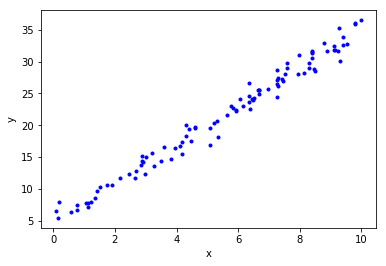

In [3]:
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Normal Equation

In this part we will try to use Normal Equation to find hyperplane best fitting given data. This is called Multivariative Linear Regression.

Normal Equation is given by the formula
\begin{align}
\mathbf{\theta} = (X^T X)^{-1} X^T \mathbf{y}
\end{align}

We will try to get the Normal Equation
Firstly let's look at the cost function - the function that we want to minimize (least squares)
\begin{align}
J(\mathbf{\theta}) = \|\mathbf{y} - X\mathbf{\theta}\|^2
\end{align}
To minimize this function we need to maximize the vector of weights. To do it we will transform the equation and use derivatives.
\begin{align}
\frac{\partial J(\mathbf \theta)}{\partial \mathbf \theta} = - 2 X^T \mathbf y + 2 X^T X \mathbf \theta
\end{align}
hence
\begin{align}
-2 X^T \mathbf y + 2 X^T X \mathbf \theta = 0
X^T X \mathbf \theta = X^T \mathbf y \\
\mathbf{\theta} = (X^T X)^{-1} X^T \mathbf{y}
\end{align}

In [4]:
theta_best = normal_equation(x, y, add_bias=True)

Now we choose two points to draw the line given by Normal Equation

In [5]:
x_test = np.array([0, 10])
x_test_biased = np.c_[np.ones((len(x_test), 1)), x_test]
y_predict = x_test_biased.dot(theta_best)
y_predict

array([[ 4.88581026],
       [35.0960578 ]])

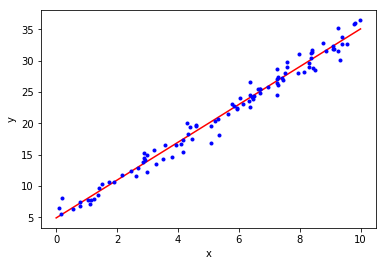

In [6]:
plt.plot(x_test, y_predict, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Gradient Descent

In [7]:
theta_best_gdsc = gradient_descent(x, y, learning_rate=0.01, number_of_iter=1000, add_bias=True)
y_predict_gdsc = x_test_biased.dot(theta_best_gdsc)
y_predict_gdsc

array([[ 4.28122704],
       [35.3708197 ]])

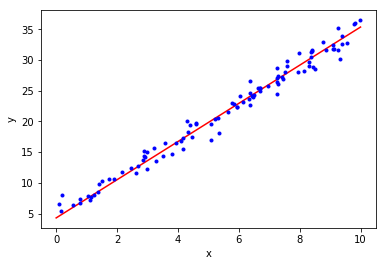

In [8]:
plt.plot(x_test, y_predict_gdsc, "r-")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try finding best parameters for Gradient Descent 

In [9]:
thetas = []
for index, learning_rate in enumerate([np.round(0.1**i, i) for i in range(2, 6)]):
    thetas.append([])
    for number_of_iter in [10**i for i in range(2, 6)]:
        tmp = gradient_descent(x, y, learning_rate, number_of_iter, add_bias=True)
        thetas[index].append([learning_rate, number_of_iter, tmp])

Let's find the best solution

In [10]:
for batch in thetas:
    print(batch)

[[0.01, 100, array([[1.31166639],
       [3.54087146]])], [0.01, 1000, array([[4.28122704],
       [3.10895927]])], [0.01, 10000, array([[4.88581025],
       [3.02102476]])], [0.01, 100000, array([[4.88581026],
       [3.02102475]])]]
[[0.001, 100, array([[0.60655802],
       [3.57317891]])], [0.001, 1000, array([[1.3110397 ],
       [3.54096261]])], [0.001, 10000, array([[4.28016612],
       [3.10911357]])], [0.001, 100000, array([[4.88581025],
       [3.02102476]])]]
[[0.0001, 100, array([[0.18031101],
       [1.17946682]])], [0.0001, 1000, array([[0.60582218],
       [3.56817218]])], [0.0001, 10000, array([[1.31097711],
       [3.54097172]])], [0.0001, 100000, array([[4.28006006],
       [3.109129  ]])]]
[[1e-05, 100, array([[0.02116549],
       [0.13949149]])], [1e-05, 1000, array([[0.18006456],
       [1.17777294]])], [1e-05, 10000, array([[0.6057477 ],
       [3.56766536]])], [1e-05, 100000, array([[1.31097085],
       [3.54097263]])]]


The amount of data is sufficiently small. That's why we will simply choose the best result, so the theta that is closest to [4, 3]. As we can see our algorithm was best for learnign_rate = 0.001 and number_of_iter = 10000

## Polynomial Regression

In [11]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(100, 1)

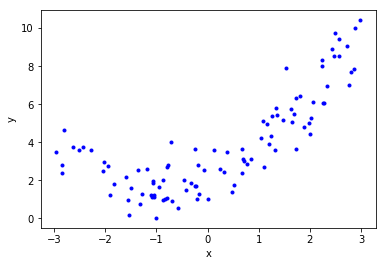

In [12]:
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

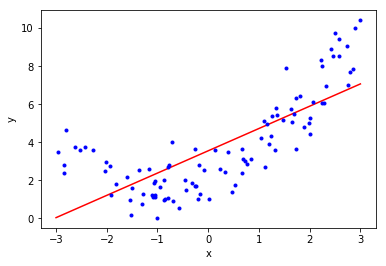

In [13]:
theta_linear = normal_equation(x, y, add_bias=True)
x_test = np.array([[-3], [3]])
x_test_biased = np.c_[np.ones((len(x_test), 1)), x_test]
y_predict_linear = x_test_biased.dot(theta_linear)
plt.plot(x_test, y_predict_linear, "r-")
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
x_polynomial = polynomial_features(x, degree=2)
theta_polynomial = normal_equation(x_polynomial, y, add_bias=True)

In [15]:
x_test_polynomial = polynomial_features(np.arange(-3, 3, 0.1).reshape(-1, 1), degree=2)
x_test_polynomial_biased = np.c_[np.ones((len(x_test_polynomial), 1)), x_test_polynomial]
y_predict_polynomial = x_test_polynomial_biased.dot(theta_polynomial)

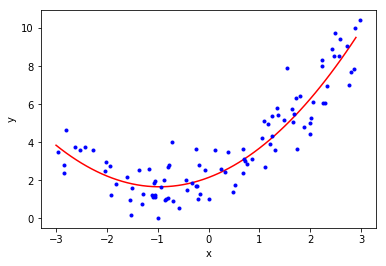

In [16]:
plt.plot(np.arange(-3, 3, 0.1), y_predict_polynomial, "r-")
plt.plot(x, y, 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Logistic Regression

This part of the "Regression Tests" will be a bit different. Here we will disscuss problems called classification. It means that we will try to teach our model to put given data into one of two sets. (multiple sets will be discussed later).

Firstly we are generating data and spliting it into two sets. In this example first set will be outside the circle of radius sqrt(0.5) and second inside.

In [47]:
x = np.random.uniform(-1, 1, [1000, 2])
y = np.array([0 if sample[0]**2 + sample[1]**2 <= 0.5 else 1 for sample in x])

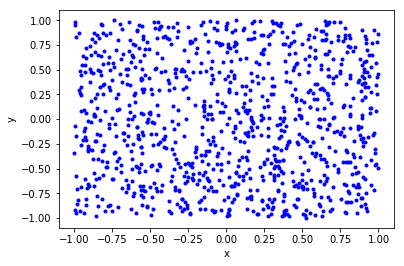

In [48]:
plt.plot(x[:, 0], x[:, 1], 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [49]:
x = polynomial_features(x, degree=2)
theta_logistic = logistic_regression(x, y, add_bias=True)

In [50]:
x_test_logistic = polynomial_features(np.random.uniform(-1, 1, [1000, 2]), degree=2)
x_test_logistic_biased = np.c_[np.ones((len(x_test_logistic), 1)), x_test_logistic]
y_predict_logistic = classify(sigmoid_function(x_test_logistic_biased, theta_logistic)).reshape(-1, 1)
x_to_plot = x_test_logistic[y_predict_logistic[:, 0] == 0]

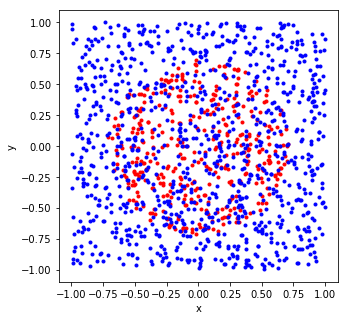

In [51]:
plt.figure(figsize=(5,5))
plt.plot(x_to_plot[:, 0], x_to_plot[:, 1], 'r.')
plt.plot(x[:, 0], x[:, 1], 'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()